# Deep Learning Practical Assignment 1

 ## Package Installation Section

In [608]:
!pip install matplotlib==3.2.2 numpy==1.19.5 scikit-learn==0.22.2.post1 keras==2.7.0 tensorflow==2.7.0

You should consider upgrading via the '/home/jupyter/DL/jupyter_env/bin/python -m pip install --upgrade pip' command.


# Implementing fully connected dataset

## Toy data set

In [609]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

In [610]:
def prepare_dataset(sigma1, sigma2):
    mu1 = [-1,0] 
    mu2 = [1,0]
    x = []
    
    x1 = np.random.normal(mu1, sigma1,size=(125,2))
    x2 = np.random.normal(mu2, sigma2,size=(125,2))
    x = np.concatenate((x1,x2),axis=0)
    
    s=[]
    for i in range(125):
        s.append(np.append(x[i],-1))
    for i in range(125,250):
        s.append(np.append(x[i],1))
        
    return s

In [611]:
def distribution_plot(X,y):
    
    #plotting the distribution
    for i,j in zip(X,y):
        if (j == -1):
            plt.scatter(i[0],i[1],c="red",marker='+')
        else:
            plt.scatter(i[0],i[1],c="blue",marker='o')

In [612]:
def get_X_y(s):
    #extracting X and y parameters with data = (xi,yi) and xi = (x1,x2)
    X = []
    y = []
    for data in s:
        X.append(data[:2])
        y.append(data[2:])
    return (X,y)

In [613]:
def train_test_set(X,y):        
    #we set shuffle parameter to True so it shuffles the dataset before splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return (X_train, X_test, y_train, y_test)

In [614]:
def perceptron(X,y,n):
    
    w = np.zeros((1,2))
    w_ = np.zeros((1,2))
    
    for i in range(n):
        for xi,yi in zip(X,y) :
            if  yi * np.inner(xi,w) <= 0 : 
                w_ = w
                w = w + yi * xi 
        # Checking if the weight hasn't been updated, if so, return the current value        
        if (w == w_).all() :
            return w
    return w

In [615]:
#the dataset declaration
s = prepare_dataset(0.25, 0.25)
X, y = get_X_y(s)
#split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_set(X,y)

## Using keras

In [616]:
# Sample code to create a fully connected network
model = Sequential()
model.add(Dense(12, input_dim =2 , activation = 'relu'))
model.add(Dense (5 , activation ='relu'))
model.add(Dense (3 , activation ='relu'))

In [617]:
# compile the keras model
model.compile( loss ='binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

# fit the keras model on the dataset
model.fit (X_train , y_train , epochs =50 , batch_size =10)

Epoch 1/50
20/20 [==============================] - 0s 2ms/step - loss: -1.0687 - accuracy: 0.0000e+00
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: -1.8747 - accuracy: 0.0000e+00
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: -1.9447 - accuracy: 0.0000e+00
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: -1.9856 - accuracy: 0.0000e+00
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: -2.0202 - accuracy: 0.0000e+00
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: -2.0510 - accuracy: 0.0000e+00
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: -2.0773 - accuracy: 0.0000e+00
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: -2.1015 - accuracy: 0.0000e+00
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: -2.1229 - accuracy: 0.0000e+00
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 

## Iris data set

In [618]:
#load iris dataset
irisData = datasets.load_iris()
X_iris = irisData.data
y_iris = irisData.target

In [619]:
#slpit dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
#converting labels to categories
y_train_categories = to_categorical(y_train)
y_test_categories = to_categorical(y_test)

## Model1: 
### 2 layers
    -input layer: 20 neurones, activation_function = 'relu'
    -ouput layer: 3 neurones, activation_function = 'softmax'

In [620]:
model1 = Sequential()
model1.add(Dense(20, input_dim=4, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss ='categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [621]:
model1.summary()

Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_380 (Dense)           (None, 20)                100       
                                                                 
 dense_381 (Dense)           (None, 3)                 63        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [622]:
model1.fit(X_train, y_train_categories, epochs=50, batch_size=10)

Epoch 1/50
12/12 [==============================] - 0s 2ms/step - loss: 1.9828 - accuracy: 0.3417
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 1.6894 - accuracy: 0.3167
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 1.4426 - accuracy: 0.2417
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 1.2490 - accuracy: 0.2250
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 1.1303 - accuracy: 0.2083
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0522 - accuracy: 0.3083
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9890 - accuracy: 0.3083
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9406 - accuracy: 0.3167
Epoch 9/50
12/12 [==============================] - 0s 1ms/step - loss: 0.8960 - accuracy: 0.5833
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.6417
Epoch 11/50
12/12 [

In [623]:
loss_result, accuracy_result = model1.evaluate(X_test,y_test_categories)
print("test set loss", loss_result)
print("test set accuracy", accuracy_result)

1/1 [==============================] - 0s 102ms/step - loss: 0.3294 - accuracy: 0.9667
test set loss 0.32937830686569214
test set accuracy 0.9666666388511658


In [624]:
y_pred = model1.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [625]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Model 2: adding hidden layers
### 5 layers:
    -layer 1: 50 neurones, activation_function = 'relu'
    -layer 2: 10 neurones, activation_function = 'relu'
    -layer 3: 7 neurones, activation_function = 'relu'
    -layer 4: 6 neurones, activation_function = 'relu' 
    -layer 5: 3 neurones, activation_function = 'softmax'  

In [626]:
model2 = Sequential()
model2.add(Dense(50, input_dim=4, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss ='categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [627]:
model2.summary()

Model: "sequential_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_382 (Dense)           (None, 50)                250       
                                                                 
 dense_383 (Dense)           (None, 10)                510       
                                                                 
 dense_384 (Dense)           (None, 7)                 77        
                                                                 
 dense_385 (Dense)           (None, 6)                 48        
                                                                 
 dense_386 (Dense)           (None, 3)                 21        
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [628]:
model2.fit(X_train, y_train_categories, epochs=50, batch_size=10)

Epoch 1/50
12/12 [==============================] - 0s 3ms/step - loss: 1.1479 - accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0673 - accuracy: 0.5667
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 1.0442 - accuracy: 0.4000
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 1.0163 - accuracy: 0.5083
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9850 - accuracy: 0.4167
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9487 - accuracy: 0.4583
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.6250
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7456 - accuracy: 0.6667
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7083
Epoch 11/50
12/12 [

In [629]:
loss_result, accuracy_result = model2.evaluate(X_test,y_test_categories)
print("test set loss", loss_result)
print("test set accuracy", accuracy_result)

1/1 [==============================] - 0s 179ms/step - loss: 0.1055 - accuracy: 0.9667
test set loss 0.10550207644701004
test set accuracy 0.9666666388511658


In [630]:
y_pred = model2.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 0])

In [631]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Model 3: adding neurones and changing loss function
### 2 layers:
     -input layer: 64 neurones, activation_function = 'relu'
     -output layer: 3 neurones, activation_function = 'softmax'

In [632]:
model3 = Sequential()
model3.add(Dense(64, input_dim=4, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(loss ='binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [633]:
model3.summary()

Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_387 (Dense)           (None, 64)                320       
                                                                 
 dense_388 (Dense)           (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [634]:
model3.fit(X_train, y_train_categories, epochs=50, batch_size=10)

Epoch 1/50
12/12 [==============================] - 0s 1ms/step - loss: 0.8009 - accuracy: 0.3417
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.3417
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.4583
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.4917
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.6917
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7833
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.7750
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.8667
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8250
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8167
Epoch 11/50
12/12 [

In [635]:
loss_result, accuracy_result = model3.evaluate(X_test,y_test_categories)
print("test set loss", loss_result)
print("test set accuracy", accuracy_result)

1/1 [==============================] - 0s 152ms/step - loss: 0.2248 - accuracy: 1.0000
test set loss 0.22481264173984528
test set accuracy 1.0


In [636]:
y_pred = model3.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [637]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The third model has got an accuracy of 1. The third model is then the best model.

# Working towards the CNN

## DIGIT data set

In [694]:
#load digit dataset
digitData = datasets.load_digits()
X_digit = digitData.data
y_digit = digitData.target.reshape(-1, 1)
input_shape = X_digit[0].shape
input_shape

(64,)

In [695]:
#slpit dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_digit, y_digit, test_size=0.2, random_state=42)
#converting labels to categories
y_train_categories = to_categorical(y_train)
y_test_categories = to_categorical(y_test)

## Model 1:
### 3 layers:
     -layer 1: 64 neurones, activation_function = 'relu'
     -layer 2: 32 neurones, activation_function = 'sigmoid'
     -layer 3: 16 neurones, activation_function = 'softmax'   

In [669]:
model1 = Sequential()
model1.add(Dense(64, input_shape=input_shape, activation='relu'))
model1.add(Dense(32, activation='sigmoid'))
model1.add(Dense(1, activation='softmax'))

In [670]:
model1.compile(loss ='categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [671]:
model1.summary()

Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_407 (Dense)           (None, 64)                4160      
                                                                 
 dense_408 (Dense)           (None, 32)                2080      
                                                                 
 dense_409 (Dense)           (None, 1)                 33        
                                                                 
Total params: 6,273
Trainable params: 6,273
Non-trainable params: 0
_________________________________________________________________


In [672]:
model1.fit(X_train, y_train, epochs=20, batch_size=4)

Epoch 1/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 2/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 3/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 4/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 5/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 6/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 7/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 8/20
360/360 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 9/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 10/20
360/360 [==============================] - 1s 2ms/st

In [688]:
loss_result, accuracy_result = model1.evaluate(X_test,y_test)
print("test set loss", loss_result)
print("test set accuracy", accuracy_result)

12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0778
test set loss 0.0
test set accuracy 0.07777778059244156


In [702]:
y_pred = model1.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

In [703]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.09      1.00      0.17        33
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        40

    accuracy                           0.09       360
   macro avg       0.01      0.10      0.02       360
weighted avg       0.01      0.09      0.02       360



## Model 2:
### 6 layers:
     -layer 1: 64 neurones, activation_function = 'relu'
     -layer 2: 32 neurones, activation_function = 'relu'
     -layer 3: 20 neurones, activation_function = 'relu' 
     -layer 4: 16 neurones, activation_function = 'relu'
     -layer 5: 12 neurones, acivation_function = 'relu'
     -layer 6: 1 neurone, activation_function = 'softmax'

In [696]:
model2 = Sequential()
model2.add(Dense(64, input_shape=input_shape, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(1, activation='softmax'))
model2.compile(loss ='categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [697]:
model2.summary()

Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_422 (Dense)           (None, 64)                4160      
                                                                 
 dense_423 (Dense)           (None, 32)                2080      
                                                                 
 dense_424 (Dense)           (None, 20)                660       
                                                                 
 dense_425 (Dense)           (None, 16)                336       
                                                                 
 dense_426 (Dense)           (None, 12)                204       
                                                                 
 dense_427 (Dense)           (None, 1)                 13        
                                                                 
Total params: 7,453
Trainable params: 7,453
Non-trai

In [698]:
model2.fit(X_train, y_train, epochs=20, batch_size=4)

Epoch 1/20
360/360 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 2/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 3/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 4/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 5/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 6/20
360/360 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 7/20
360/360 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 8/20
360/360 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 9/20
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1072
Epoch 10/20
360/360 [==============================] - 1s 3ms/st

In [699]:
loss_result, accuracy_result = model2.evaluate(X_test,y_test)
print("test set loss", loss_result)
print("test set accuracy", accuracy_result)

12/12 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0778
test set loss 0.0
test set accuracy 0.07777778059244156


In [700]:
y_pred = model2.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

In [701]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.09      1.00      0.17        33
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        40

    accuracy                           0.09       360
   macro avg       0.01      0.10      0.02       360
weighted avg       0.01      0.09      0.02       360



## Face data set

In [704]:
#load dataset
faceData = fetch_olivetti_faces()
X_face = faceData.data
y_face = faceData.target.reshape(-1, 1)
input_shape = X_face[0].shape
X_face.shape

(400, 4096)

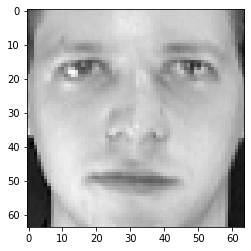

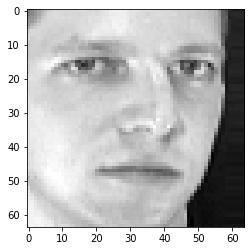

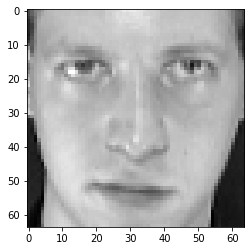

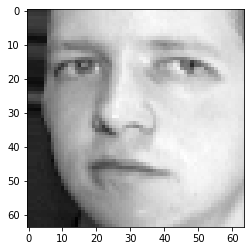

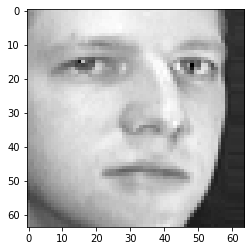

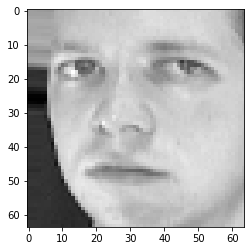

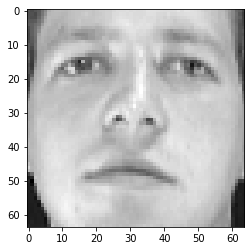

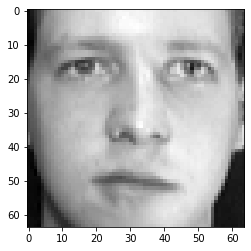

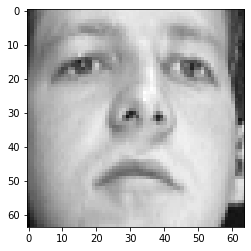

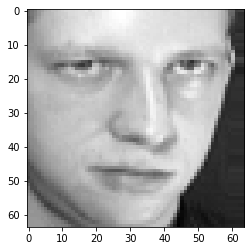

In [705]:
#plot the first 10 images
for i in range(10):
  plt.imshow(faceData.images[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [706]:
#slpit dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_face, y_face, test_size=0.2, random_state=42)

In [708]:
model = Sequential()
model.add(Dense(1024, input_shape=input_shape, activation ='relu'))
model.add(Dense(40, activation = "softmax" ))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
32/32 [==============================] - 1s 29ms/step - loss: 5.9450 - accuracy: 0.0250
Epoch 2/20
32/32 [==============================] - 1s 27ms/step - loss: 3.7084 - accuracy: 0.0500
Epoch 3/20
32/32 [==============================] - 1s 31ms/step - loss: 3.5446 - accuracy: 0.0875
Epoch 4/20
32/32 [==============================] - 1s 30ms/step - loss: 3.4587 - accuracy: 0.1000
Epoch 5/20
32/32 [==============================] - 1s 28ms/step - loss: 3.3007 - accuracy: 0.1219
Epoch 6/20
32/32 [==============================] - 1s 26ms/step - loss: 3.1779 - accuracy: 0.1656
Epoch 7/20
32/32 [==============================] - 1s 29ms/step - loss: 3.0754 - accuracy: 0.1750
Epoch 8/20
32/32 [==============================] - 1s 29ms/step - loss: 2.8659 - accuracy: 0.2219
Epoch 9/20
32/32 [==============================] - 1s 27ms/step - loss: 2.7071 - accuracy: 0.3063
Epoch 10/20
32/32 [==============================] - 1s 27ms/step - loss: 2.5005 - accuracy: 0.3688
Epoch 11/

In [709]:
loss_result, accuracy_result = model.evaluate(X_test,y_test)
print("test set loss", loss_result)
print("test set accuracy", accuracy_result)

3/3 [==============================] - 0s 19ms/step - loss: 1.5348 - accuracy: 0.6625
test set loss 1.5347909927368164
test set accuracy 0.6625000238418579


This model achieved an accuracy of 66,25% which is bigger than 30%.
This model is composed of 2 layers. The first layer is composed of 1024 neurones and uses relu as activation function. The second layer is composed of 40 neurones and uses softmax as activation function.
The loss function used is sparse_categorical_crossentropy.
The optimizer used is 'adam'.